In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [23]:
t1, y1 = np.loadtxt('damp1.txt', unpack=True, skiprows=7, usecols=[0, 1])
t2, y2 = np.loadtxt('damp2.txt', unpack=True, skiprows=7, usecols=[0, 1])
y1 = y1 - np.mean(y1)
y2 = y2 - np.mean(y2)
time = t1

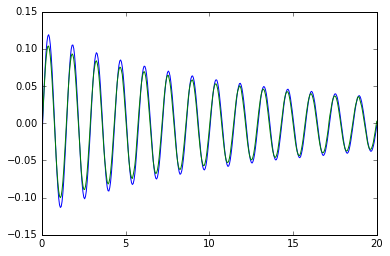

In [24]:
plt.plot(t1, y1)
plt.plot(t2, y2)

In [25]:
yavg = np.zeros_like(y1)
yerr = np.zeros_like(y1)
for ii in range(len(y1)):
    yavg[ii] = np.mean([y1[ii], y2[ii]])
    yerr[ii] = np.std([y1[ii], y2[ii]]) # / np.sqrt(2)

(5, 7)

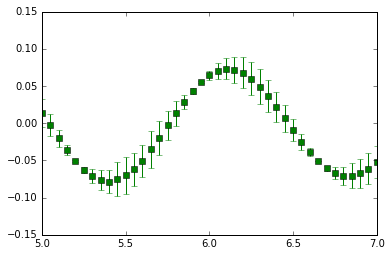

In [26]:
plt.errorbar(time, yavg, 4*yerr, color='g', fmt='s')
plt.xlim(5, 7)

In [27]:
def shm(time, A, omega, gamma):
    ymodel = A * np.cos(omega * time - gamma)
    return ymodel

In [30]:
param, _ = curve_fit(shm, time, yavg, sigma=yerr, p0=[0.1, 2*np.pi/1.0, 0.5])
ymodel = shm(time, param[0], param[1], param[2])
print(param)

[ 0.06676995  6.37126339  2.624137  ]


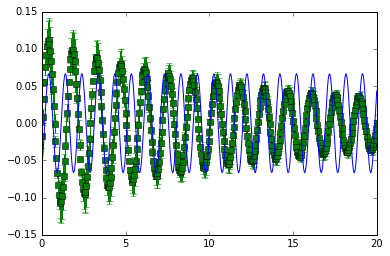

In [31]:
plt.errorbar(time, yavg, 4*yerr, color='g', fmt='s')
plt.plot(time, ymodel)